Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#define directory paths

df_paths=[
    "./data/domestic-consumption.csv",
    "./data/exports-calendar-year.csv",
    "./data/exports-crop-year.csv",
    "./data/gross-opening-stocks.csv",
    "./data/total-production.csv"
]

Clean and prepare the data

In [ ]:
dfs=[pd.read_csv(df_path) for df_path in df_paths]

In [ ]:
#process data 2
#making mean value of every df columns and attaching it to country

def get_means(df):
    df=df.copy()
    countries=df[df.columns[0]]
    mean=df.mean(axis=1)
    df=pd.concat([countries,mean],axis=1)
    df.columns=['country',countries.name]
    return df



In [ ]:
#process data 2
def make_df(dfs):
    
    # Process all DataFrames
    processed_dfs = []
    
    for df in dfs:
        processed_dfs.append(get_means(df))
        
    # Merge DataFrames
    df = processed_dfs[0]
    
    for i in range(1, len(processed_dfs)):
        df = df.merge(processed_dfs[i], on='country')
    
    return df

data=make_df(dfs)

In [ ]:
##rename columns and output to same csv (already done, doesn't need running)
#df = df.rename(columns={'1990/91': '1990', '1991/92': '1991', '1992/93': '1992', '1993/94': '1993', '1994/95': '1994', '1995/96': '1995', '1996/97': '1996', '1997/98': '1997', '1998/99': '1998', '1999/00': '1999', '2000/01': '2000', '2001/02': '2001', '2002/03': '2002', '2003/04': '2003', '2004/05': '2004', '2005/06': '2005', '2006/07': '2006', '2007/08': '2007', '2008/09': '2008', '2009/10': '2009', '2010/11': '2010', '2011/12': '2011', '2012/13': '2012', '2013/14': '2013', '2014/15': '2014', '2015/16': '2015', '2016/17': '2016', '2017/18': '2017', '2018/19': '2018', '2019/20': '2019'})
#df.to_csv('Domestic_Coffee_Consumption.csv')

In [ ]:
#Ensure no null values exist in our data
data.isna().sum() #returns False for all
data = data.dropna()

In [ ]:
#Ensure no duplicate rows exist in our data
data.loc[data.duplicated()] #Nothing returned
data = data.drop_duplicates()

In [ ]:
#reset data frame and index, sorting by domestic consumption
data = data.sort_values(by='domestic_consumption', ascending=False)
data = data.reset_index(drop=True)

Analysis and Visualization

In [ ]:
#Create bar graph of top ten Countries by coffee consumption
top_ten_consume = data.head(10)
top_ten_consume = top_ten_consume.plot.bar(x='country', y = 'domestic_consumption', rot=50, title='Domestic Consumption by Country')
top_ten_consume.set_ylabel('Domestic Consumption')

In [ ]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
top_ten_export = data.head(10)
top_ten_export = top_ten_export.plot.bar(x='country', y = 'exports', rot=50, title='Coffee Exported by Country')
top_ten_export.set_ylabel('Coffee Exports')

In [ ]:
#Drop the outlier in the data (Brazil)
data = data.drop(data.query("country=='Brazil'").index)

In [ ]:
#Create bar graph of top ten Countries by coffee consumption
top_ten_consume = data.head(10)
top_ten_consume = top_ten_consume.plot.bar(x='country', y = 'domestic_consumption', rot=50, title='Domestic Consumption by Country')
top_ten_consume.set_ylabel('Domestic Consumption')

In [ ]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
top_ten_export = data.head(10)
top_ten_export = top_ten_export.plot.bar(x='country', y = 'exports', rot=50, title='Coffee Exported by Country')
top_ten_export.set_ylabel('Coffee Exports')

In [ ]:
#Create new dataframe off only numeric fields, create correlation map
stats = data[['exports', 'domestic_consumption', 'exports_crop_year', 'gross_opening_stocks', 'total_production']]
stats.corr()

In [ ]:
#Create heatmap of correlated data
sns.set_theme(style="white")
corr = stats.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1 )
corr.style.background_gradient(cmap='coolwarm')
plt.matshow(corr)

In [ ]:
#Scatter plot comparing domestic consumption x exports
data.plot(kind='scatter', x='domestic_consumption', y='exports', title='Country Domestic Consumption x Exports')

In [ ]:
#Create a grid of pairplots between domestic consumption, exports, and production
sns.pairplot(data, vars=['domestic_consumption', 'exports', 'total_production'])
plt.show()

In [147]:
#Read in new data file
df = pd.read_csv('Domestic_Coffee_Consumption.csv')
df.head(10)

,Unnamed: 0,Country,Coffee type,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_domestic_consumption
0,0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,1,Bolivia,Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000
5,5,Indonesia,Robusta/Arabica,74520000,76800000,79140000,81540000,84000000,86580000,89160000,...,220020000,234000000,255000000,265020000,273000000,279000000,285000000,288000000,288360000,4920480000
6,6,Madagascar,Robusta,21000000,18000000,21000000,21600000,9999960,10020000,10020000,...,27000000,25800000,24600000,23400000,22200000,21600000,21900000,22500000,22500000,588705960
7,7,Malawi,Arabica,120000,120000,120000,120000,120000,120000,120000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,2340000
8,8,Papua New Guinea,Arabica/Robusta,180000,180000,180000,120000,120000,120000,120000,...,74160,102660,122340,115440,108000,120000,120000,120000,120000,3608400
9,9,Paraguay,Arabica,900000,900000,900000,1200000,1200000,1200000,1200000,...,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,35100000


In [149]:
#Create new dataframe of coffee types, clean data a bit
types = df['Coffee type']
types = types.replace({'Robusta/Arabica':'Both'})
types = types.replace({'Arabica/Robusta':'Both'})
pie = types.value_counts()

<Axes: title={'center': 'Total Coffee Consumed by Type'}, ylabel='Coffee type'>

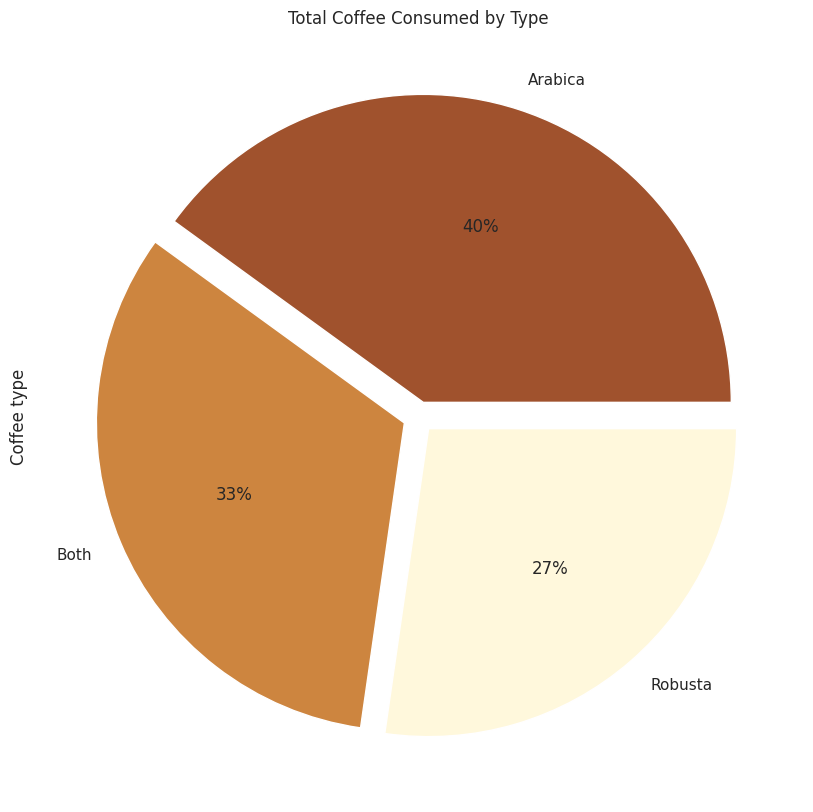

In [163]:
# Defining colors for the pie chart
colors = ['sienna', 'peru', 'cornsilk']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)

#Create pie chart of coffee types
pie.plot(kind='pie', title="Total Coffee Consumed by Type", autopct='%1.0f%%', colors=colors, explode=explode)

In [ ]:
#Transpose the data frame
pivot = df.transpose()

#rename columns to row 1
pivot.columns = pivot.iloc[1]

#drop first two rows
pivot = pivot.iloc[3:]

#drop unnecessary row
pivot = pivot.drop('Total_domestic_consumption')

#rename index
pivot.index.names = ['Year']

pivot

In [ ]:
pivot

In [ ]:
#Create Brazil dataframe with just Brazil data
Brazil = pivot['Brazil']
Brazil

In [ ]:
#Create line graph of Brazilian coffee consumption over time.
sns.set(rc={"figure.figsize":(40, 10)})
scatter = sns.lineplot(data=pivot, x='Year', y='Brazil')
scatter.set_title('Brazilian Coffee Consumption Over Time', fontdict={'size': 30, 'weight': 'bold'})
scatter.set_xlabel('Year', fontdict={'size': 15})
scatter.set_ylabel('Coffee Consumed (billion kg)', fontdict={'size': 15})

In [ ]:
Brazil

In [110]:
#Read in new data file
df = pd.read_csv('./data/total-production.csv')
df.head(10)


,total_production,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001
5,Indonesia,7441.3830,8493.1960,5569.4780,6743.2880,5367.878,4573.4290,8220.584,7620.778,7295.9550,...,11379.6699,9128.5118,6888.9233,13070.0386,12900.9493,10946.2773,12585.4751,11541.0266,10852.3153,9417.5942
6,Madagascar,982.4470,932.5130,1121.6840,441.8590,641.372,785.0090,849.008,623.804,991.7990,...,456.9613,529.7233,584.8528,499.7094,584.4758,501.4544,425.2061,420.8227,408.7848,396.3764
7,Malawi,104.6280,124.2860,137.1610,62.1110,84.112,91.2350,48.650,60.820,64.3210,...,16.9220,16.9285,25.8264,22.8262,27.7944,24.7098,21.2015,19.5160,14.4703,12.8493
8,Papua New Guinea,962.8410,746.8160,900.1110,1019.4810,1138.659,1002.3630,1089.348,1074.021,1352.1490,...,1037.9942,866.5184,1413.8545,716.4880,835.3594,797.5642,711.9818,1171.1449,733.9382,930.3690
9,Paraguay,130.6270,79.6530,54.2910,70.0460,24.689,22.8430,25.563,23.379,58.3470,...,20.0167,20.1965,20.0195,20.0065,20.0069,20.0725,20.0000,20.0101,20.0024,20.0135
